## **2.5 Unsupervised Learning – K-Means & Hierarchical Clustering**

**Import clustering tools**

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

**Elbow Method for optimal K in K-Means**

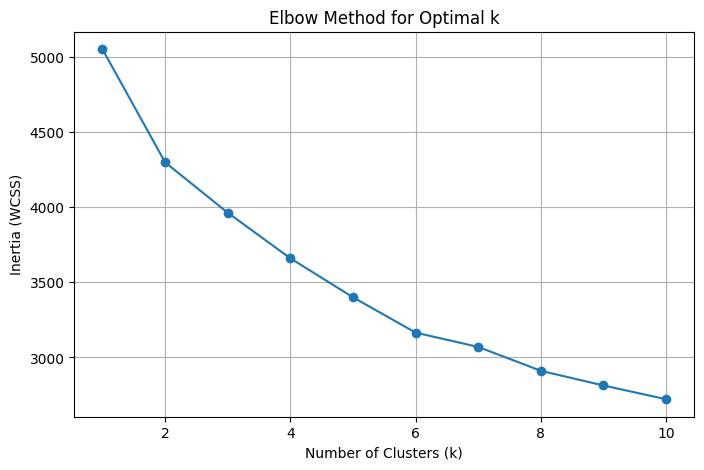

In [ ]:
inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_df)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

**Fit K-Means with chosen K**

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
k_labels = kmeans.fit_predict(X_scaled_df)

# Evaluate clustering
print("Silhouette Score (K-Means):", silhouette_score(X_scaled_df, k_labels))

Silhouette Score (K-Means): 0.12857489057057786


**Visualize K-Means clusters with PCA (for 2D plotting only)**

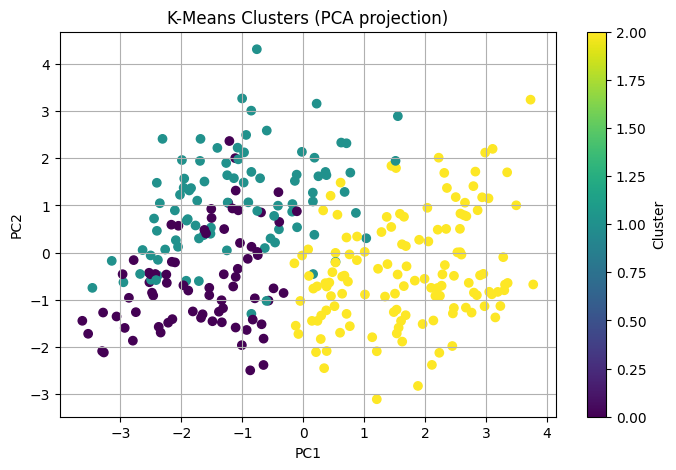

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled_df)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=k_labels, cmap='viridis')
plt.title("K-Means Clusters (PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

**Hierarchical Clustering – Dendrogram**

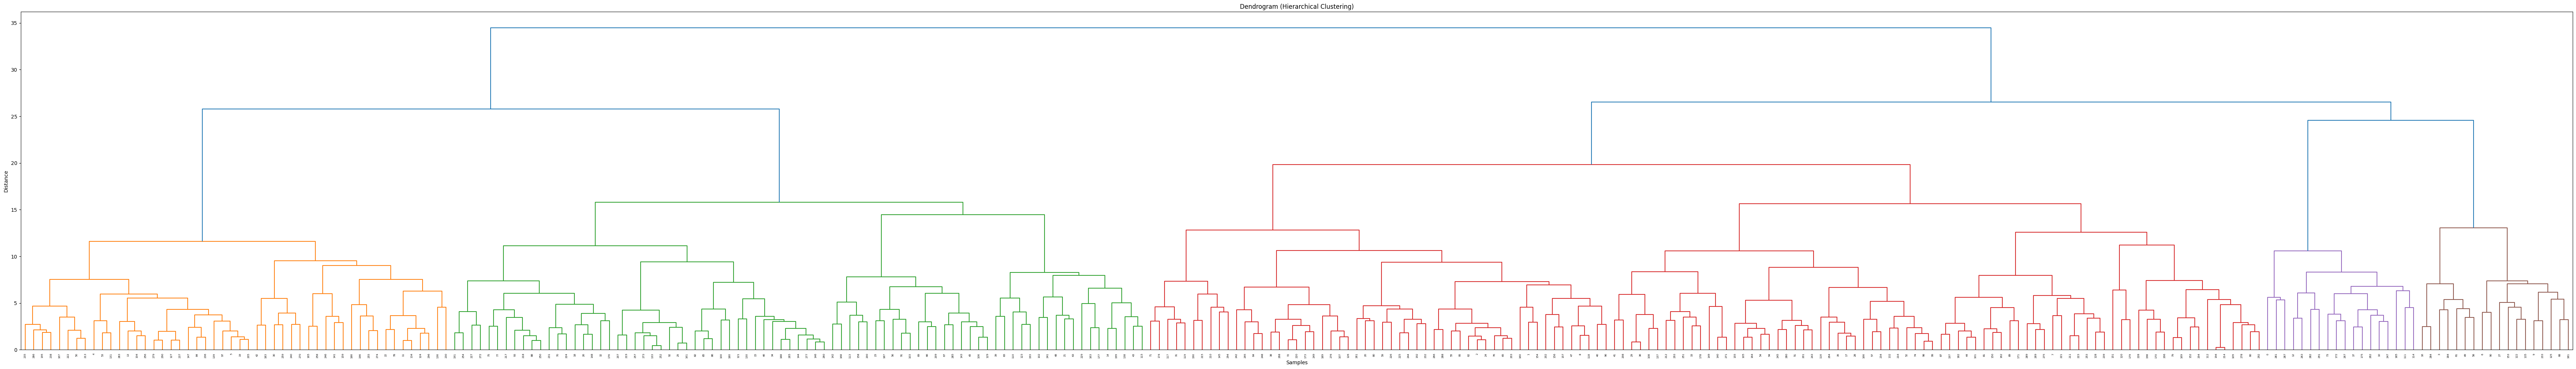

In [ ]:
plt.figure(figsize=(90, 12))
dendrogram = sch.dendrogram(sch.linkage(X_scaled_df, method='ward'))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

**Fit Agglomerative Clustering**

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled_df)

# Evaluate
print("Silhouette Score (Hierarchical):", silhouette_score(X_scaled_df, agglo_labels))

Silhouette Score (Hierarchical): 0.12459339759790126


### ✅ Deliverables:

- Elbow Plot (for K in K-Means)
- Cluster visualization (PCA-reduced 2D)
- Dendrogram for Hierarchical Clustering
- Silhouette scores for both methods
- Optional: compare clusters to actual `y` labels for insights

**Next Step:** 2.6 Hyperparameter Tuning